### Email:

Az volna az elso kerdes, hogy a jelenlegi adatokbol hogy latjuk vissza az 500 altalunk tervezett oligot, vagyis milyen azok reprezentacioja.

Technikailag ket dolgot csinaltunk, ezert van egy rovidebb es egy hosszabb amplikon. A rovidebb, közvetlenül a hatarszekvenciakkal kezdodik es vegzodik.

- oV869_P7NP_fw TCTTGTGGAAAGGACGAAACACCG
- oV870_P7NP_rev GTTTAAGAGCTATGCTGGAAACAG

A hosszabbnak ezek kb pont a kozepen vannak. Nagyjából fele-fele aranyban kevertuk ossze a ket PCR termeket, a kerdes az volna, hogy melyik hasznalhatobb minoseg es reprezentacio szempontjából, azzal mennénk majd tovabb.

In [1]:
#imports
from utils import *
from speedup import *

--- Warning! This version of speedup.py can cause errors. ---


In [2]:
thymine_path = "/v/volumes/nanopore/timin_uracil/oligos/timin20250417/"+\
               "timin_oligos_20250417/20250417_1447_MC-114328_AXB238_56275db9/"

---
# Reference oligos

In [3]:
import pandas as pd
reference_oligos = pd.read_excel("references/reference_oligos.xlsx").Sequence.values


In [4]:
len(reference_oligos[0])

300

In [5]:
import generate_kmer
k_mer_num, num_of_reads, min_overlap = 7, 500, 7

In [6]:
print(generate_kmer.PROMOTER == 'TCTTGTGGAAAGGACGAAACACCG') 
print(generate_kmer.TERMINATOR == 'GTTTAAGAGCTATGCTGGAAACAG')

True
True


In [7]:
k_mers_list = generate_kmer.generate_k_mer_list('ATCG', k_mer_num)
k_mers_list

array(['AAAAAAA', 'AAAAAAT', 'AAAAAAC', ..., 'GGGGGGT', 'GGGGGGC',
       'GGGGGGG'], dtype='<U7')

---
# Pod5 dataset

In [8]:
import pod5
thymine_pod5_path = thymine_path + "pod5/"
thymine_pod5_files = glob(thymine_pod5_path+"*")

with pod5.Reader(thymine_pod5_files[0]) as reader:
    for read in reader.reads():
        print
        print("Read ID:", read.read_id)
        print("ADC signal:", read.signal)
        print(" pA signal:", read.signal_pa)
        break

Read ID: af9e7db1-de4f-48bd-aded-4907f4a3378d
ADC signal: [574 517 530 ... 612 617 651]
 pA signal: [131.9991   118.959335 121.93332  ... 140.69229  141.83612  149.61424 ]


---
# Fastq dataset

In [9]:
thymine_fastq_path = thymine_path + "fastq_pass/"
thymine_fastq_files = glob(thymine_fastq_path+"*")

In [10]:
def read_fastq_gz(filepath):
    import gzip
    with gzip.open(filepath, 'rt') as f:  
        while True:
            header = f.readline().strip()
            if not header:
                break
            sequence = f.readline().strip()
            plus = f.readline().strip()
            quality = f.readline().strip()
            yield header, sequence, plus, quality

read_ids = []
fastq_sequences = []
len_sequences = []
max_idx=117 ##len(thymine_fastq_files) #== 234
iter_idx = 0
for file in tqdm(thymine_fastq_files[:max_idx], total=len(thymine_fastq_files[:max_idx]), desc="Loading data"):
    for header, sequence, plus, quality in read_fastq_gz(file):
        read_ids.append(header.split(' ')[0][1:])
        fastq_sequences.append(sequence)
        len_sequences.append(len(sequence))

Loading data: 100%|██████████| 117/117 [01:12<00:00,  1.61it/s]


In [11]:
filter_idx = np.array(fastq_sequences)

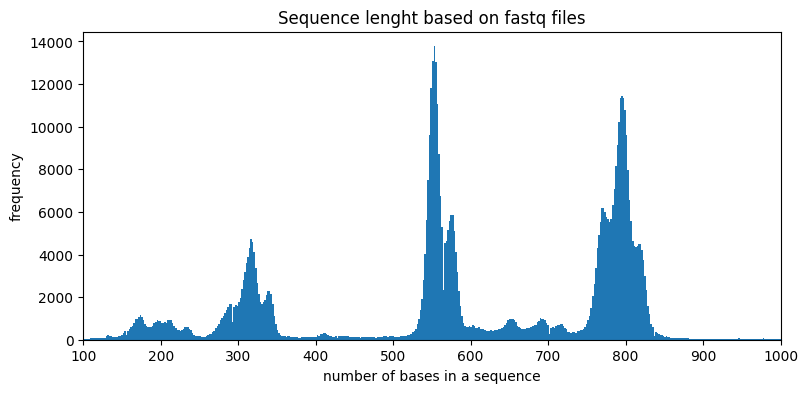

In [16]:
plt.figure(figsize=(9, 4))
plt.hist(len_sequences, bins=3500)
plt.title('Sequence lenght based on fastq files')
plt.xlabel('number of bases in a sequence')
plt.ylabel('frequency')
plt.xlim(100, 1000)
plt.savefig('figures/seq_lengths.pdf')
plt.show()

In [13]:
len(fastq_sequences)

595206

In [14]:
print('Fastq start/end          Ref. promoter/terminator')
print()
for i in np.random.choice(len(fastq_sequences), 5):
    print(fastq_sequences[i][:len(generate_kmer.PROMOTER)], generate_kmer.PROMOTER)
    print(fastq_sequences[i][-len(generate_kmer.TERMINATOR):], generate_kmer.TERMINATOR)
    print()

Fastq start/end          Ref. promoter/terminator

TGCTACTGGTTCGTTACGTATTGC TCTTGTGGAAAGGACGAAACACCG
CTGTTCCGACCCTGCCGCTTTTCT GTTTAAGAGCTATGCTGGAAACAG

ATGTTTTGCGTCTGCTTCGTTCAA TCTTGTGGAAAGGACGAAACACCG
TTACCGGATACCTGTCAGCAATAC GTTTAAGAGCTATGCTGGAAACAG

TTTGTTGTAACCTACTCGTTCAGT TCTTGTGGAAAGGACGAAACACCG
GTTCCGACCCTGCCGCTTGGAAAT GTTTAAGAGCTATGCTGGAAACAG

GTTTATGTTAGCCTACTTGGTTCA TCTTGTGGAAAGGACGAAACACCG
CTCCTGTTCCGACCCTGCCGCTTA GTTTAAGAGCTATGCTGGAAACAG

TTTTGTGGTATTTACTTGGTTCAC TCTTGTGGAAAGGACGAAACACCG
CGGATACCTGTCAGCAATACGTAC GTTTAAGAGCTATGCTGGAAACAG



----